<a href="https://colab.research.google.com/github/Upendra6465/credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,469446.000000,4.694450e+05,469445.000000,469445.000000,469444.000000,469444.000000,4.694440e+05,4.694440e+05,469444.000000,469444.000000,469444.000000
mean,117559.860453,4.172155e+17,70.119288,48794.676156,38.538717,-90.207780,8.917733e+04,1.354007e+09,38.538530,-90.207364,0.006026
std,68102.041208,1.308799e+18,152.862548,26870.039604,5.069945,13.735465,3.018688e+05,2.254980e+07,5.105110,13.748145,0.077395
min,0.000000,6.041621e+10,1.000000,52.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,58680.250000,1.800400e+14,9.640000,26237.000000,34.668900,-96.790900,7.430000e+02,1.331134e+09,34.747742,-96.874664,0.000000
50%,117361.000000,3.520550e+15,47.430000,48174.000000,39.354300,-87.461600,2.443000e+03,1.372026e+09,39.366582,-87.414588,0.000000
75%,176041.750000,4.635331e+15,83.200000,72011.000000,41.940400,-80.158000,2.047800e+04,1.375611e+09,41.957501,-80.237120,0.000000
max,244384.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.379483e+09,67.510267,-66.952352,1.000000


In [ ]:
print(train.shape)
print(test.shape)


(225061, 23)
(244385, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  469446.000000  4.694450e+05  469445.000000  469445.000000   
mean   117559.860453  4.172155e+17      70.119288   48794.676156   
std     68102.041208  1.308799e+18     152.862548   26870.039604   
min         0.000000  6.041621e+10       1.000000      52.000000   
25%     58680.250000  1.800400e+14       9.640000   26237.000000   
50%    117361.000000  3.520550e+15      47.430000   48174.000000   
75%    176041.750000  4.635331e+15      83.200000   72011.000000   
max    244384.000000  4.992346e+18   17897.240000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  469444.000000  469444.000000  4.694440e+05  4.694440e+05   
mean       38.538717     -90.207780  8.917733e+04  1.354007e+09   
std         5.069945      13.735465  3.018688e+05  2.254980e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.790900  7.430000e+02  1

In [ ]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time        cc_num  \
0                0   2020-06-21 12:14:25  2.291164e+15   
1                1   2020-06-21 12:14:33  3.573030e+15   
2                2   2020-06-21 12:14:53  3.598215e+15   
3                3   2020-06-21 12:15:15  3.591920e+15   
4                4   2020-06-21 12:15:17  3.526826e+15   
...            ...                   ...           ...   
244380      244380   2020-09-18 05:38:44  4.247922e+12   
244381      244381   2020-09-18 05:39:19  2.657851e+15   
244382      244382   2020-09-18 05:39:32  4.134457e+15   
244383      244383   2020-09-18 05:39:42  3.023054e+13   
244384      244384             2020-09-1           NaN   

                                    merchant        category    amt     first  \
0                      fraud_Kirlin and Sons   personal_care   2.86      Jeff   
1                       fraud_Sporer-Keebler   personal_care  29.84    Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28    Ashley   
3                          fraud_Haley Group        misc_pos  60.05     Brian   
4                      fraud_Johnston-Casper          travel   3.19    Nathan   
...                                      ...             ...    ...       ...   
244380                fraud_O'Hara-Wilderman     food_dining  44.54    Judith   
244381       fraud_Zboncak, Rowe and Murazik    shopping_net   9.25      Alan   
244382                    fraud_Smith-Stokes        misc_pos   8.28  Lawrence   
244383    fraud_Mosciski, Gislason and Mertz     grocery_pos  89.57    Hayden   
244384                                   NaN             NaN    NaN       NaN   

            last gender                           street  ...      lat  \
0        Elliott      M                351 Darlene Green  ...  33.9659   
1       Williams      F                 3638 Marsh Union  ...  40.3207   
2          Lopez      F             9333 Valentine Point  ...  40.6729   
3       Williams      M      32941 Krystal Mill Apt. 552  ...  28.5697   
4         Massey      M         5783 Evan Roads Apt. 465  ...  44.2529   
...          ...    ...                              ...  ...      ...   
244380      Moss      F  46297 Benjamin Plains Suite 703  ...  39.5370   
244381    Howard      M  04139 Johnson Prairie Suite 401  ...  42.3749   
244382     Ellis      M        1471 Alicia Flat Apt. 993  ...  40.6645   
244383   Sanders      M        8465 Reed Green Suite 559  ...  40.9661   
244384       NaN    NaN                              NaN  ...      NaN   

            long  city_pop                        job         dob  \
0       -80.9355  333497.0        Mechanical engineer  1968-03-19   
1      -110.4360     302.0     Sales professional, IT  1990-01-17   
2       -73.5365   34496.0          Librarian, public  1970-10-21   
3       -80.8191   54767.0               Set designer  1987-07-25   
4       -85.0170    1126.0         Furniture designer  1955-07-06   
...          ...       ...                        ...         ...   
244380  -83.4550   22305.0   Television floor manager  1939-03-09   
244381  -83.1087  673342.0  Trading standards officer  1946-11-01   
244382  -73.7559   38912.0         Production manager  1961-11-07   
244383  -76.8575     645.0                 Orthoptist  1974-05-18   
244384       NaN       NaN                        NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                  ...           ...        ...         ...   
244380  080b4

In [ ]:
train.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2019-01-01 00:00:18     2703186189652095   
1                1   2019-01-01 00:00:44         630423337322   
2                2   2019-01-01 00:00:51       38859492057661   
3                3   2019-01-01 00:01:16     3534093764340240   
4                4   2019-01-01 00:03:06      375534208663984   
...            ...                   ...                  ...   
225056      225056   2019-04-23 18:43:45  4223708906367574214   
225057      225057   2019-04-23 18:43:49     3521815216091574   
225058      225058   2019-04-23 18:44:03        4186530744674   
225059      225059   2019-04-23 18:46:42  4040099974063068803   
225060      225060   2019-04-23 18:47:04      213195754007681   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
225056    fraud_Koss, McLaughlin and Mayer     food_dining   54.29       Adam   
225057                 fraud_Gulgowski LLC            home   79.88      Wayne   
225058              fraud_Kautzer and Sons   personal_care   73.10      Casey   
225059                    fraud_Stark-Koss            home   91.25    Jeffrey   
225060                fraud_Dietrich-Fadel  health_fitness  115.24    Zachary   

           last gender                          street  ...      lat  \
0         Banks      F                  561 Perry Cove  ...  36.0788   
1          Gill      F    43039 Riley Greens Suite 393  ...  48.8878   
2       Sanchez      M        594 White Dale Suite 530  ...  42.1808   
3         White      M     9443 Cynthia Court Apt. 038  ...  46.2306   
4        Garcia      M                408 Bradley Rest  ...  38.4207   
...         ...    ...                             ...  ...      ...   
225056   Riddle      M              27718 Mason Bypass  ...  39.0965   
225057    Marsh      M              172 Leonard Island  ...  39.7532   
225058   Howell      F  374 Christopher Ramp Suite 855  ...  33.3645   
225059    Lewis      M              24255 Bryan Square  ...  48.3396   
225060    Allen      M    69252 Oconnor Alley Apt. 153  ...      NaN   

            long  city_pop                                job         dob  \
0       -81.1781    3495.0          Psychologist, counselling  1988-03-09   
1      -118.2105     149.0  Special educational needs teacher  1978-06-21   
2      -112.2620    4154.0        Nature conservation officer  1962-01-19   
3      -112.1138    1939.0                    Patent attorney  1967-01-12   
4       -79.4629      99.0     Dance movement psychotherapist  1986-03-28   
...          ...       ...                                ...         ...   
225056  -84.6431     177.0                Exhibition designer  1974-05-30   
225057 -105.6356     565.0                Mental health nurse  1978-08-27   
225058  -81.2718    4913.0                   Technical brewer  1966-11-10   
225059 -102.2400     229.0                      Administrator  1983-03-20   
225060       NaN       NaN                                NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4       a41d7549acf

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data', 'train', and 'test' DataFrames are already loaded

# Label Encoding
label_encoders = {}
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

# Verify if 'trans_date_trans_time' exists in the DataFrame
if 'trans_date_trans_time' in data.columns:
    # Datetime Conversion
    data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    # ... rest of your code ...
else:
    print("Column 'trans_date_trans_time' not found in the 'data' DataFrame.")
    # Investigate why the column is missing and take appropriate action

Column 'trans_date_trans_time' not found in the 'data' DataFrame.


In [ ]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(data.shape)

(225061, 18)
(244385, 18)
(469446, 23)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0        cc_num  merchant  category     amt  gender  state  \
0           0  2.703186e+15       514         8    4.97       0     26   
1           1  6.304233e+11       241         4  107.23       0     46   
2           2  3.885949e+13       390         0  220.11       1     12   
3           3  3.534094e+15       360         2   45.00       1     25   
4           4  3.755342e+14       297         9   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1808 -112.2620  ...  43.1

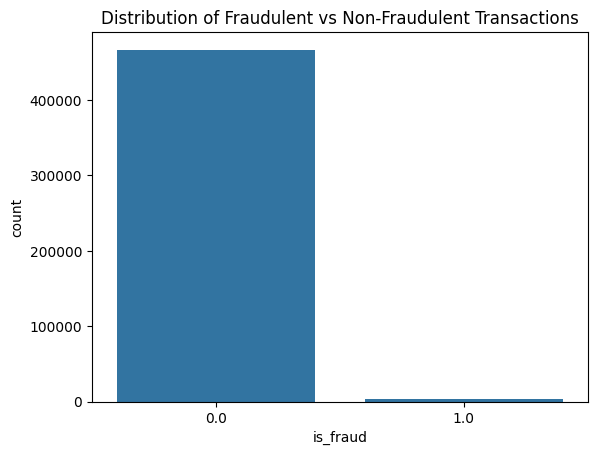

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed

# Reset index to ensure unique labels
data = data.reset_index(drop=True)

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [ ]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

0
0


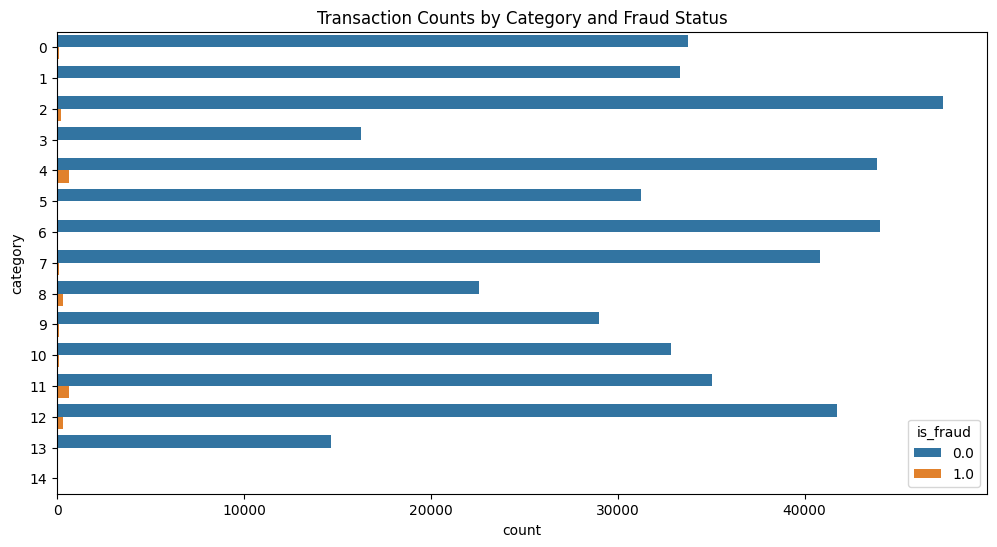

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

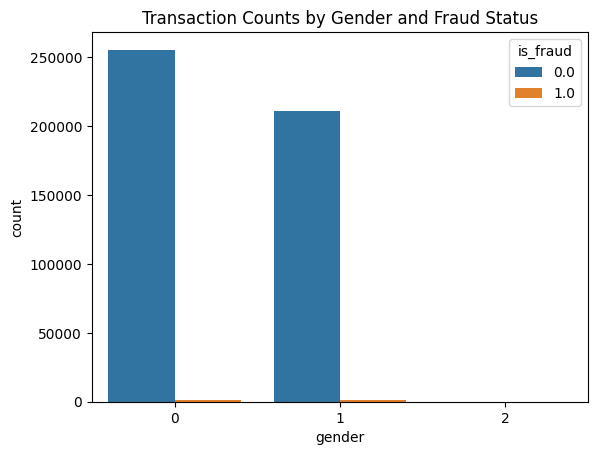

In [ ]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()


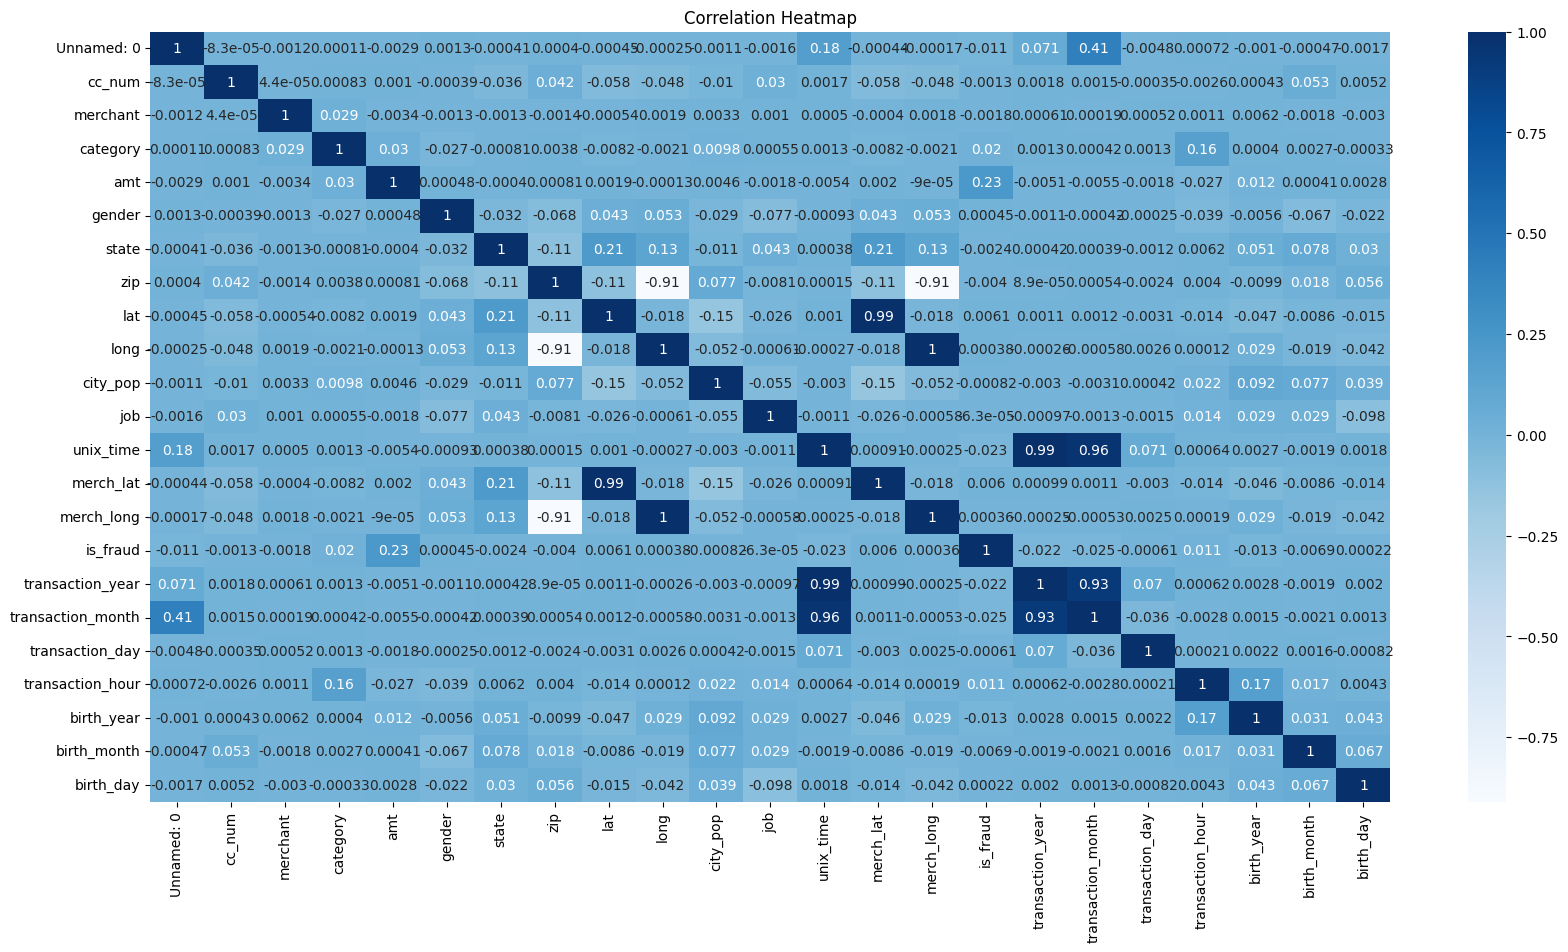

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Handle missing values in target variable before model training
y_train.fillna(y_train.mode()[0], inplace=True)  # Use mode for categorical target
y_test.fillna(y_train.mode()[0], inplace=True)    # Ensure consistency with training set

# Check for and handle non-binary values in the target variable
# This step is crucial if the original data or the filling process introduced non-binary values
y_train = y_train.astype(int)  # Convert to integer if necessary
y_test = y_test.astype(int)    # Ensure consistency

# Training the model for logisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     93334
           1       0.00      0.00      0.00       556

    accuracy                           0.99     93890
   macro avg       0.50      0.50      0.50     93890
weighted avg       0.99      0.99      0.99     93890

[[93334     0]
 [  556     0]]
Accuracy: 0.9940781765896262


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93334
           1       0.77      0.83      0.80       556

    accuracy                           1.00     93890
   macro avg       0.88      0.91      0.90     93890
weighted avg       1.00      1.00      1.00     93890

[[93194   140]
 [   96   460]]
Accuracy: 0.99748642027905


In [ ]:
# Training the model with logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     93334
           1       0.00      0.00      0.00       556

    accuracy                           0.99     93890
   macro avg       0.50      0.50      0.50     93890
weighted avg       0.99      0.99      0.99     93890

[[93334     0]
 [  556     0]]
Accuracy: 0.9940781765896262


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
